## Bank Term Deposit Prediction (Binary Classification)
Dataset(https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions/data)

In [10]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import tensorflow as tf

### Loading the dataset

In [11]:
df_train = pd.read_csv("data/bank-term-deposit/train.csv")
df_testing = pd.read_csv("data/bank-term-deposit/test.csv")

In [12]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
df_train.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Visualizing the dataset

<Axes: >

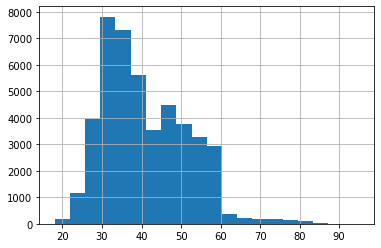

In [15]:
df_train.age.hist(bins=20)

<Axes: >

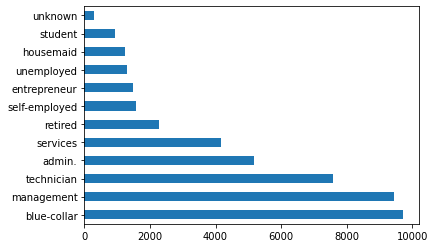

In [16]:
df_train.job.value_counts().plot(kind='barh')

<Axes: >

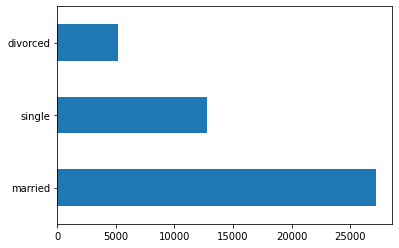

In [17]:
df_train.marital.value_counts().plot(kind='barh')

<Axes: >

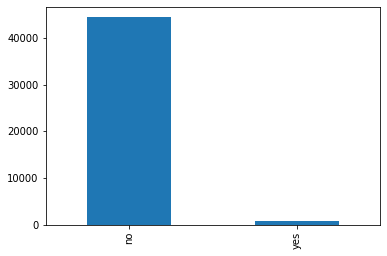

In [18]:
df_train['default'].value_counts().plot(kind='bar')

Default is imbalanced to drop the column on feature engineering

<Axes: >

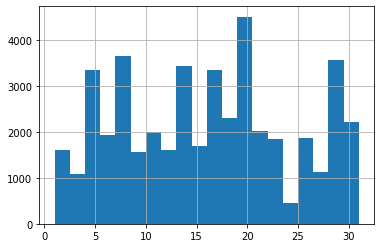

In [19]:
df_train.day.hist(bins=20)

### Cleaning the dataset

In [20]:
df_train.drop(columns=['default'], inplace=True)
df_testing.drop(columns=['default'], inplace=True)

In [21]:
df_train = df_train.dropna(axis=0)
df_testing = df_testing.dropna(axis=0)

### Extract the Labels

In [22]:
df_train.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
train_data = df_train.drop('y', axis=1)

In [24]:
train_data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [25]:
train_labels = df_train['y']

In [26]:
train_labels

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [27]:
test_data = df_testing.drop('y', axis=1)
test_labels =df_testing['y']

### Feature Engineering
Now that we have our dataset ready and our labels extracted, we want to make sure that our feature are represented as numbers. Here we can see that our feature dataset is both represented by both numeric and categorical dataset, and this is a problem because cant feed categorical data into the neural-net as it only understand numbers.

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


#### Handling Categorical Data

In [29]:
CATEGORICAL_COLUMNS_TRAIN = train_data.select_dtypes(object)
CATEGORICAL_COLUMNS_TEST = test_data.select_dtypes(object)

In [30]:
CATEGORICAL_COLUMNS_TRAIN.head()

,job,marital,education,housing,loan,contact,month,poutcome
0,management,married,tertiary,yes,no,unknown,may,unknown
1,technician,single,secondary,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,unknown,may,unknown


In [31]:
CATEGORICAL_COLUMNS_TEST.columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [32]:
NUMERIC_COLUMNS_TRAIN = train_data.select_dtypes(['int64'])
NUMERIC_COLUMNS_TEST = test_data.select_dtypes('int64')

In [33]:
NUMERIC_COLUMNS_TRAIN.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


1. One-hot encoding
2. Hashing
3. LabelEncoding

In [36]:
df_train_encoded = pd.get_dummies(CATEGORICAL_COLUMNS_TRAIN, columns=CATEGORICAL_COLUMNS_TRAIN.columns)

In [37]:
df_train_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#### LabelEncoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
test_month = le.fit_transform(CATEGORICAL_COLUMNS_TRAIN['month'])

In [42]:
test_month
print(test_month.ndim) #1 D tensor

1


In [43]:
CATEGORICAL_COLUMNS_TRAIN.head()

,job,marital,education,housing,loan,contact,month,poutcome
0,management,married,tertiary,yes,no,unknown,may,unknown
1,technician,single,secondary,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,unknown,may,unknown


In [44]:
for col in CATEGORICAL_COLUMNS_TRAIN:
    le = LabelEncoder()
    CATEGORICAL_COLUMNS_TRAIN[col]  = le.fit_transform(CATEGORICAL_COLUMNS_TRAIN[col])
clear_output()

for col in CATEGORICAL_COLUMNS_TEST:
    le = LabelEncoder()
    CATEGORICAL_COLUMNS_TEST[col]  = le.fit_transform(CATEGORICAL_COLUMNS_TEST[col])
clear_output()



In [45]:
CATEGORICAL_COLUMNS_TRAIN.head()

,job,marital,education,housing,loan,contact,month,poutcome
0,4,1,2,1,0,2,8,3
1,9,2,1,1,0,2,8,3
2,2,1,1,1,1,2,8,3
3,1,1,3,1,0,2,8,3
4,11,2,3,0,0,2,8,3


In [46]:
print(CATEGORICAL_COLUMNS_TRAIN.ndim) # 2D Tensor , Vectors
print(CATEGORICAL_COLUMNS_TEST.shape) #
print(CATEGORICAL_COLUMNS_TEST.dtypes)

2
(4521, 8)
job          int64
marital      int64
education    int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
dtype: object


##### Joining our feature dataframes

In [47]:
# axis = 1 this will concat the 2 df side by side
NUMERIC_TRAIN_DATA = pd.concat([CATEGORICAL_COLUMNS_TRAIN,NUMERIC_COLUMNS_TRAIN], axis=1)
NUMERIC_TEST_DATA = pd.concat([CATEGORICAL_COLUMNS_TEST,NUMERIC_COLUMNS_TEST], axis=1)

In [48]:
NUMERIC_TRAIN_DATA.head()

,job,marital,education,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,1,0,2,8,3,58,2143,5,261,1,-1,0
1,9,2,1,1,0,2,8,3,44,29,5,151,1,-1,0
2,2,1,1,1,1,2,8,3,33,2,5,76,1,-1,0
3,1,1,3,1,0,2,8,3,47,1506,5,92,1,-1,0
4,11,2,3,0,0,2,8,3,33,1,5,198,1,-1,0


In [51]:
NUMERIC_TRAIN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        45211 non-null  int64
 1   marital    45211 non-null  int64
 2   education  45211 non-null  int64
 3   housing    45211 non-null  int64
 4   loan       45211 non-null  int64
 5   contact    45211 non-null  int64
 6   month      45211 non-null  int64
 7   poutcome   45211 non-null  int64
 8   age        45211 non-null  int64
 9   balance    45211 non-null  int64
 10  day        45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


#### Handling Skewed Features - Scaling Numeric features
* Skewed data and outliers can negatively impact the performance of machine learning models. Scaling the features can help in handling such cases. By transforming the data to a standardized range, it reduces the impact of extreme values and makes the model more robust.
* If your numerical features have different scales, it's usually a good idea to standardize them to have a mean of 0 and a standard deviation of 1. You can do this using StandardScaler from sklearn.preprocessing:

In [50]:
from sklearn.preprocessing import StandardScaler

In [54]:
numeric_features = NUMERIC_TRAIN_DATA.select_dtypes('int64').columns.to_list()
numeric_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [55]:
scaler = StandardScaler()
NUMERIC_TRAIN_DATA[numeric_features] = scaler.fit_transform(NUMERIC_TRAIN_DATA[numeric_features])

In [56]:
NUMERIC_TRAIN_DATA

,job,marital,education,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,-0.103820,-0.275762,1.036362,0.893915,-0.436803,1.514306,0.823773,0.444898,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,1.424008,1.368372,-0.300556,0.893915,-0.436803,1.514306,0.823773,0.444898,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.714951,-0.275762,-0.300556,0.893915,2.289359,1.514306,0.823773,0.444898,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,-1.020516,-0.275762,2.373280,0.893915,-0.436803,1.514306,0.823773,0.444898,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,2.035139,1.368372,2.373280,-1.118674,-0.436803,1.514306,0.823773,0.444898,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.424008,-0.275762,1.036362,-1.118674,-0.436803,-0.713012,1.156344,0.444898,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,0.201746,-1.919895,-1.637474,-1.118674,-0.436803,-0.713012,1.156344,0.444898,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,0.201746,-0.275762,-0.300556,-1.118674,-0.436803,-0.713012,1.156344,-0.566175,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,-1.020516,-0.275762,-0.300556,-1.118674,-0.436803,0.400647,1.156344,0.444898,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [57]:
numeric_features = NUMERIC_TEST_DATA.select_dtypes('int64').columns.to_list()
scaler = StandardScaler()
NUMERIC_TEST_DATA[numeric_features] = scaler.fit_transform(NUMERIC_TEST_DATA[numeric_features])

In [58]:
NUMERIC_TEST_DATA

,job,marital,education,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,1.716804,-0.246429,-1.644755,-1.142051,-0.424756,-0.723642,1.485414,0.444413,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,0.795246,-0.246429,-0.309038,0.875617,2.354292,-0.723642,0.819288,-2.579961,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.126313,1.421396,1.026680,0.875617,-0.424756,-0.723642,-1.845220,-2.579961,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-0.126313,-0.246429,1.026680,0.875617,2.354292,1.495133,0.153161,0.444413,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,-1.047871,-0.246429,-0.309038,0.875617,-0.424756,1.495133,0.819288,0.444413,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.795246,-0.246429,-0.309038,0.875617,-0.424756,-0.723642,-0.179903,0.444413,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413
4517,0.488060,-0.246429,1.026680,0.875617,2.354292,1.495133,0.819288,0.444413,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413
4518,1.409618,-0.246429,-0.309038,-1.142051,-0.424756,-0.723642,-1.512157,0.444413,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413
4519,-1.047871,-0.246429,-0.309038,-1.142051,-0.424756,-0.723642,-0.846030,-1.571836,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197


In [61]:
NUMERIC_TRAIN_DATA.shape
NUMERIC_TRAIN_DATA.ndim #2D tensor Vector

2

In [62]:
train_labels

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

### Handling Labels - One-hot encoding

In [63]:
one_hot_encoded_train_labels = LabelEncoder().fit_transform(train_labels)
one_hot_encoded_test_labels = LabelEncoder().fit_transform(test_labels)

In [64]:
one_hot_encoded_train_labels

array([0, 0, 0, ..., 1, 0, 0])

### Extract Train, Validation and Test Sets
* Why use separate training and test sets? Because you should never test a machine- learning model on the same data that you used to train it! Just because a model performs well on its training data doesn't mean it will perform well on data it has never seen and what you care about is your model's performance on new data (because you already know the labels of your training data - obviously you don't need your model to predict those). For instance, it's possible that your model could end up merely memorizing a mapping between your training samples and their targets, which would be useless for the task of predicting targets for data the model has never seen before.
* We already have test sets now i need to extract validation data. In order to monitor during training the accuracy of the model on data it has never seen before, i'll create a validation set by setting apart 10% samples from the original training data.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#Train data, Validation, Train Labels, Validation Labels
X_train, X_val, y_train, y_val = train_test_split(NUMERIC_TRAIN_DATA, one_hot_encoded_train_labels, test_size=0.1, random_state=42)

In [67]:
X_train.head()

,job,marital,education,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
14565,-0.409385,-0.275762,-1.637474,0.893915,-0.436803,-0.713012,-0.173939,0.444898,-1.124080,-0.447419,-0.096898,0.228471,0.076230,-0.411453,-0.251940
20546,-0.103820,-1.919895,-0.300556,-1.118674,-0.436803,-0.713012,-1.504223,0.444898,1.512791,-0.317359,-0.457371,-0.583101,-0.246560,-0.411453,-0.251940
34495,-1.020516,-0.275762,-1.637474,-1.118674,-0.436803,-0.713012,0.823773,0.444898,1.230269,-0.212916,-1.298476,-0.128776,-0.569351,-0.411453,-0.251940
13814,0.812877,-0.275762,-0.300556,-1.118674,-0.436803,-0.713012,-0.173939,0.444898,1.041921,0.233100,-0.697687,-0.132659,-0.569351,-0.411453,-0.251940
42153,-0.103820,-0.275762,1.036362,-1.118674,-0.436803,-0.713012,1.156344,-2.588321,-0.653211,0.136540,-1.418634,0.387679,-0.569351,1.216469,0.616335


In [69]:
print(X_train.shape)
print(X_val.shape)
print(X_train.ndim)

(40689, 15)
(4522, 15)
2
